In [207]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm

path = os.path.abspath(os.path.dirname(os.getcwd())) + '\\data'

In [208]:
info_article = pd.read_csv(path+'\\info\\info_article_o_8_n.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_8.csv')
info_year = pd.read_csv(path+'\\info\\info_year_o_8.csv')

In [209]:
# three types of indexes : 
# 1. Views
# 2. Crossref
# 3. Web_of_science

# Firstly,
# analysis based on Crossref

def describe_crossref(info_article):
    
    crossref = info_article['Crossref']
    
    mean = crossref.mean()
    std = crossref.std()
    
    x_axis_value = info_issue['period'].values
    
    x = info_article['period'].values
    y = info_article['Crossref'].values
    
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Crossref', fontsize=10)
    
    # ax.set_xlim('1999-01-01','2021-01-01')
    ax.set_ylim(-10,400)
    ax.set_xticks(range(0,len(x_axis_value),10))
    # ax.set_xticklabels() 
    
    ax.hlines(mean+2*std, xmin=0, xmax=1,
              linestyle='--', linewidth=0.75, alpha=0.55, color='#e377c2')
    
    ax.hlines(mean-2*std, xmin=0, xmax=1,
              linestyle='--', linewidth=0.75, alpha=0.55, color='#e377c2')
    
    ax.fill_between([0,len(x_axis_value)-1],
                    mean-2*std, mean+2*std,
                    alpha=0.065, color='#e377c2')
    
    ax.text(0, 330, 
            r'$\mu = $'+str(format(mean,'.4f'))+'\n'+
            r'$\sigma = $'+str(format(std,'.4f')))
    
    
    ax.scatter(x, y, marker='o',s=9,
               facecolors='none',edgecolors='black')

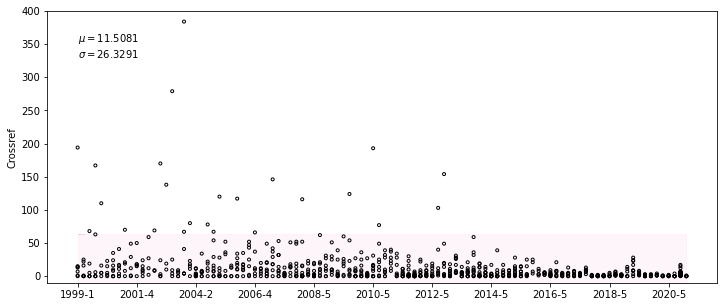

In [210]:
describe_crossref(info_article)

In [211]:
# factor 1: time

issue_group_help_mean = info_article['Crossref'].groupby([info_article['number_volume'], 
                                                          info_article['number_issue']]).mean()
issue_group_help_max = info_article['Crossref'].groupby([info_article['number_volume'], 
                                                         info_article['number_issue']]).max()
issue_group_help_median = info_article['Crossref'].groupby([info_article['number_volume'], 
                                                            info_article['number_issue']]).median()

issue_group = pd.DataFrame(issue_group_help_mean._stat_axis.values.tolist(),
                           columns = ['number_volume', 'number_issue'])

issue_group['Crossref_mean'] = issue_group_help_mean.values
issue_group['Crossref_max'] = issue_group_help_max.values
issue_group['Crossref_median'] = issue_group_help_median.values

info_issue = pd.merge(info_issue, issue_group, how = 'left')

info_issue = info_issue[['number_volume', 'number_issue', 'article_quant',
                         'year', 'period',
                         'article_one_quant', 'article_one_share', 
                         'article_judge_quant', 'article_judge_share',
                         'name_book_len_mean', 'name_book_len_std',
                         'page_start', 'page_end', 'page_start_mod',
                         'page_quant_1', 'page_quant_2', 
                         'page_quant_mean', 'page_quant_std', 
                         'page_quant_min', 'page_quant_max',
                         'author_number_mean', 'author_number_std', 
                         'author_number_min', 'author_number_max',
                         'Crossref_mean', 'Crossref_max', 'Crossref_median',
                         'theme', 'special_1']]

In [212]:
info_issue.to_csv(path+'\\info\\info_issue_o_9.csv',index=False,sep=',')
info_issue.head()

,number_volume,number_issue,article_quant,year,period,article_one_quant,article_one_share,article_judge_quant,article_judge_share,name_book_len_mean,...,page_quant_max,author_number_mean,author_number_std,author_number_min,author_number_max,Crossref_mean,Crossref_max,Crossref_median,theme,special_1
0,1,1,7,1999,1999-1,5,0.714286,1,0.142857,44.714286,...,26,1.857143,1.864454,1,6,34.857143,194,13.0,NaN,0
1,1,2,7,1999,1999-2,6,0.857143,2,0.285714,37.000000,...,43,2.714286,4.535574,1,13,9.142857,25,1.0,NaN,0
2,1,3,6,1999,1999-3,3,0.500000,2,0.333333,45.666667,...,40,2.833333,4.535049,0,12,15.333333,68,2.5,NaN,0
3,2,1,6,2000,2000-1,2,0.333333,0,0.000000,25.666667,...,28,1.333333,0.816497,0,2,39.333333,167,3.0,NaN,0
4,2,2,5,2000,2000-2,3,0.600000,0,0.000000,34.000000,...,28,1.000000,0.707107,0,2,27.200000,110,5.0,NaN,0


In [213]:
info_article = pd.read_csv(path+'\\info\\info_article_o_8_n.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_9.csv')
info_year = pd.read_csv(path+'\\info\\info_year_o_8.csv')

In [214]:
def describe_crossref_2(info_issue):
    
    x = info_issue['period'].values
    x_axis_value = info_issue['period'].values
    
    y_mean = info_issue['Crossref_mean'].values
    y_max = info_issue['Crossref_max'].values
    y_median = info_issue['Crossref_median'].values
    
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Crossref', fontsize=10)
    
    ax.set_ylim(-10,400)
    ax.set_xticks(range(0,len(x_axis_value),10))
    
    ax.plot(x, y_mean,linewidth=1, color='#e377c2',label='mean')
    ax.plot(x, y_max,linewidth=1, color='#bcbd22', label='maximum')
    ax.plot(x, y_median,linewidth=1, color='#17becf', label='median')
    
    ax.legend()

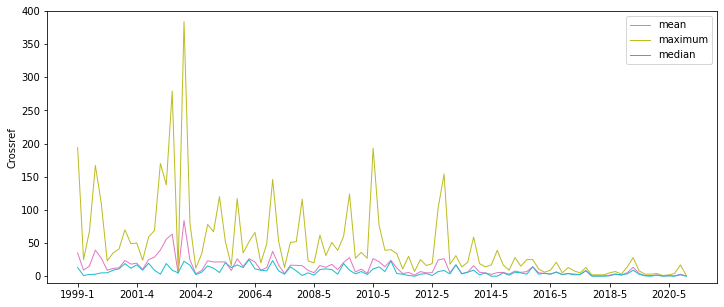

In [215]:
describe_crossref_2(info_issue)

In [220]:
def describe_crossref_2_mean(info_issue):
    
    x = info_issue['period'].values
    x_axis_value = info_issue['period'].values
    
    y_mean = info_issue['Crossref_mean'].values

    lowess=sm.nonparametric.lowess
    z=lowess(y_mean,range(0,len(x)),frac=0.3)
    
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Crossref (mean)', fontsize=10)
    
    ax.set_ylim(-10,100)
    ax.set_xticks(range(0,len(x_axis_value),10))
    
    ax.scatter(x, y_mean, marker='o', s=9,
               facecolors='none', edgecolors='#e377c2')
    ax.plot(z[:,0],z[:,1],color='#e377c2',lw=1.5)

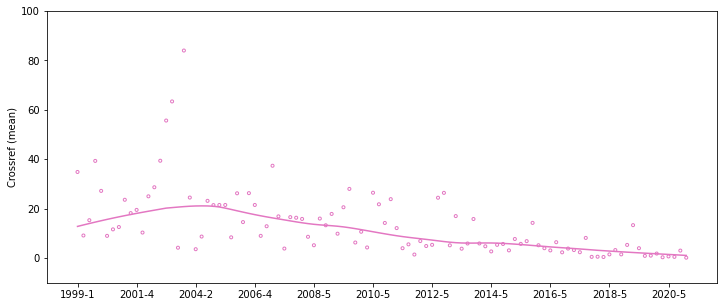

In [221]:
describe_crossref_2_mean(info_issue)

In [222]:
def describe_crossref_2_max(info_issue):
    
    x = info_issue['period'].values
    x_axis_value = info_issue['period'].values
    
    y_max = info_issue['Crossref_max'].values

    lowess=sm.nonparametric.lowess
    z=lowess(y_max,range(0,len(x)),frac=0.3)
    
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Crossref (maximum)', fontsize=10)
    
    ax.set_ylim(-10,100)
    ax.set_xticks(range(0,len(x_axis_value),10))
    
    ax.scatter(x, y_max, marker='o', s=9,
               facecolors='none', edgecolors='#bcbd22')
    ax.plot(z[:,0],z[:,1],color='#bcbd22',lw=1.5)

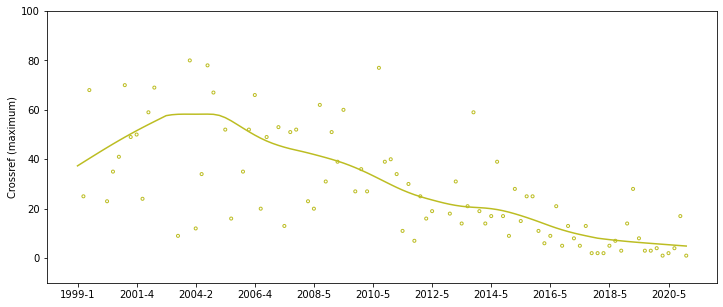

In [223]:
describe_crossref_2_max(info_issue)

In [224]:
def describe_crossref_2_median(info_issue):
    
    x = info_issue['period'].values
    x_axis_value = info_issue['period'].values
    
    y_median = info_issue['Crossref_median'].values

    lowess=sm.nonparametric.lowess
    z=lowess(y_median,range(0,len(x)),frac=0.3)
    
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Crossref (median)', fontsize=10)
    
    ax.set_ylim(-10,100)
    ax.set_xticks(range(0,len(x_axis_value),10))
    
    ax.scatter(x, y_median, marker='o', s=9,
               facecolors='none', edgecolors='#17becf')
    ax.plot(z[:,0],z[:,1],color='#17becf',lw=1.5)

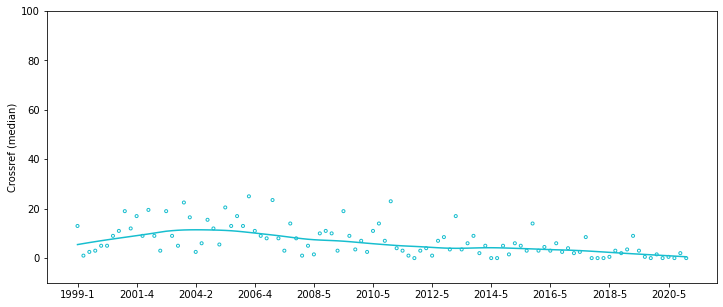

In [225]:
describe_crossref_2_median(info_issue)

In [100]:
info_article = pd.read_csv(path+'\\info\\info_article_o_8_n.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_9.csv')
info_year = pd.read_csv(path+'\\info\\info_year_o_8.csv')

In [247]:
# factor 2: issue
info_group_help_1 = info_article[info_article['number_issue']=='1']

year_group_help_mean_1 = info_group_help_1['Crossref'].groupby([info_group_help_1['year']]).mean()
year_group_help_max_1 = info_group_help_1['Crossref'].groupby([info_group_help_1['year']]).max()
year_group_help_median_1 = info_group_help_1['Crossref'].groupby([info_group_help_1['year']]).median()

year_group = pd.DataFrame(year_group_help_mean_1._stat_axis.values.tolist(),
                          columns = ['year'])

year_group['Crossref_mean_1'] = year_group_help_mean_1.values
year_group['Crossref_max_1'] = year_group_help_max_1.values
year_group['Crossref_median_1'] = year_group_help_median_1.values

info_group_help_2 = info_article[info_article['number_issue']=='2']

year_group_help_mean_2 = info_group_help_2['Crossref'].groupby([info_group_help_2['year']]).mean()
year_group_help_max_2 = info_group_help_2['Crossref'].groupby([info_group_help_2['year']]).max()
year_group_help_median_2 = info_group_help_2['Crossref'].groupby([info_group_help_2['year']]).median()

year_group['Crossref_mean_2'] = year_group_help_mean_2.values
year_group['Crossref_max_2'] = year_group_help_max_2.values
year_group['Crossref_median_2'] = year_group_help_median_2.values

info_group_help_3 = info_article[info_article['number_issue']=='3']

year_group_help_mean_3 = info_group_help_3['Crossref'].groupby([info_group_help_3['year']]).mean()
year_group_help_max_3 = info_group_help_3['Crossref'].groupby([info_group_help_3['year']]).max()
year_group_help_median_3 = info_group_help_3['Crossref'].groupby([info_group_help_3['year']]).median()

year_group['Crossref_mean_3'] = np.append(year_group_help_mean_3.values, np.nan)
year_group['Crossref_max_3'] = np.append(year_group_help_max_3.values, np.nan)
year_group['Crossref_median_3'] = np.append(year_group_help_median_3.values, np.nan)

info_group_help_4 = info_article[info_article['number_issue']=='4']

year_group_help_mean_4 = info_group_help_4['Crossref'].groupby([info_group_help_4['year']]).mean()
year_group_help_max_4 = info_group_help_4['Crossref'].groupby([info_group_help_4['year']]).max()
year_group_help_median_4 = info_group_help_4['Crossref'].groupby([info_group_help_4['year']]).median()

year_group['Crossref_mean_4'] = np.insert(np.append(year_group_help_mean_4.values, np.nan),0,np.nan)
year_group['Crossref_max_4'] = np.insert(np.append(year_group_help_max_4.values, np.nan),0,np.nan)
year_group['Crossref_median_4'] = np.insert(np.append(year_group_help_median_4.values, np.nan),0,np.nan)

info_group_help_5 = info_article[info_article['number_issue']=='5']

year_group_help_mean_5 = info_group_help_5['Crossref'].groupby([info_group_help_5['year']]).mean()
year_group_help_max_5 = info_group_help_5['Crossref'].groupby([info_group_help_5['year']]).max()
year_group_help_median_5 = info_group_help_5['Crossref'].groupby([info_group_help_5['year']]).median()

year_group['Crossref_mean_5'] = np.append([np.nan]*8, np.append(year_group_help_mean_5.values, np.nan))
year_group['Crossref_max_5'] = np.append([np.nan]*8, np.append(year_group_help_max_5.values, np.nan))
year_group['Crossref_median_5'] = np.append([np.nan]*8, np.append(year_group_help_median_5.values, np.nan))

In [248]:
year_group.head()

,year,Crossref_mean_1,Crossref_max_1,Crossref_median_1,Crossref_mean_2,Crossref_max_2,Crossref_median_2,Crossref_mean_3,Crossref_max_3,Crossref_median_3,Crossref_mean_4,Crossref_max_4,Crossref_median_4,Crossref_mean_5,Crossref_max_5,Crossref_median_5
0,1999,34.857143,194,13.0,9.142857,25,1.0,15.333333,68.0,2.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,39.333333,167,3.0,27.200000,110,5.0,9.000000,23.0,5.0,11.625,35.0,9.0,NaN,NaN,NaN
2,2001,12.571429,41,11.0,23.600000,70,19.0,18.200000,49.0,12.0,19.500,50.0,17.0,NaN,NaN,NaN
3,2002,10.333333,24,9.0,25.000000,59,19.5,28.666667,69.0,9.0,39.400,170.0,3.0,NaN,NaN,NaN
4,2003,55.666667,138,19.0,63.400000,279,9.0,4.200000,9.0,5.0,84.000,384.0,22.5,NaN,NaN,NaN


In [249]:
year_group.tail()

,year,Crossref_mean_1,Crossref_max_1,Crossref_median_1,Crossref_mean_2,Crossref_max_2,Crossref_median_2,Crossref_mean_3,Crossref_max_3,Crossref_median_3,Crossref_mean_4,Crossref_max_4,Crossref_median_4,Crossref_mean_5,Crossref_max_5,Crossref_median_5
18,2017,6.428571,21,6.0,2.333333,5,2.5,3.857143,13.0,4.0,3.250000,8.0,2.0,2.375000,5.0,2.5
19,2018,8.166667,13,8.5,0.500000,2,0.0,0.555556,2.0,0.0,0.444444,2.0,0.0,1.500000,5.0,0.5
20,2019,3.250000,7,3.0,1.500000,3,2.0,5.333333,14.0,3.5,13.333333,28.0,9.0,4.000000,8.0,3.0
21,2020,0.900000,3,0.5,1.000000,3,0.0,1.833333,4.0,1.5,0.333333,1.0,0.0,0.666667,2.0,0.5
22,2021,0.500000,4,0.0,0.166667,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
info_year = pd.merge(info_year, year_group, how = 'left')

info_year.head()
info_year.to_csv(path+'\\info\\info_year_o_9.csv',index=False,sep=',')

In [251]:
def describe_crossref_3_mean(info_year):
    
    x = info_year['year'].values
    
    y1= info_year['Crossref_mean_1'].values
    y2= info_year['Crossref_mean_2'].values
    y3= info_year['Crossref_mean_3'].values
    y4= info_year['Crossref_mean_4'].values
    y5= info_year['Crossref_mean_5'].values
    
    lowess=sm.nonparametric.lowess
    z1=lowess(y1,range(0,len(x)),frac=0.7)
    z2=lowess(y2,range(0,len(x)),frac=0.7)
    z3=lowess(y3,range(0,len(x)),frac=0.7)
    z4=lowess(y4,range(0,len(x)),frac=0.7)
    z5=lowess(y5,range(0,len(x)),frac=0.7)
    
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Crossref (mean)', fontsize=10)
    
    ax.set_ylim(-10,50)
    
    ax.scatter(x, y1, marker='o', s=9,
               facecolors='none', edgecolors='#1f77b4')
    ax.plot(x,z1[:,1],color='#1f77b4',lw=1.5,label='issue 1')
    ax.scatter(x, y2, marker='o', s=9,
               facecolors='none', edgecolors='#ff7f0e')
    ax.plot(x,z2[:,1],color='#ff7f0e',lw=1.5,label='issue 2')
    ax.scatter(x, y3, marker='o', s=9,
               facecolors='none', edgecolors='#2ca02c')
    ax.plot(x[0:22:1],z3[:,1],color='#2ca02c',lw=1.5,label='issue 3')
    ax.scatter(x, y4, marker='o', s=9,
               facecolors='none', edgecolors='#d62728')
    ax.plot(x[1:22:1],z4[:,1],color='#d62728',lw=1.5,label='issue 4')
    ax.scatter(x, y5, marker='o', s=9,
               facecolors='none', edgecolors='#9467bd')
    ax.plot(x[8:22:1],z5[:,1],color='#9467bd',lw=1.5,label='issue 5')
    
    ax.legend()

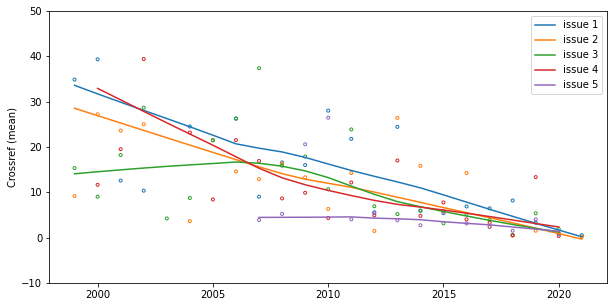

In [252]:
describe_crossref_3_mean(info_year)

In [253]:
def describe_crossref_3_median(info_year):
    
    x = info_year['year'].values
    
    y1= info_year['Crossref_median_1'].values
    y2= info_year['Crossref_median_2'].values
    y3= info_year['Crossref_median_3'].values
    y4= info_year['Crossref_median_4'].values
    y5= info_year['Crossref_median_5'].values
    
    lowess=sm.nonparametric.lowess
    z1=lowess(y1,range(0,len(x)),frac=0.7)
    z2=lowess(y2,range(0,len(x)),frac=0.7)
    z3=lowess(y3,range(0,len(x)),frac=0.7)
    z4=lowess(y4,range(0,len(x)),frac=0.7)
    z5=lowess(y5,range(0,len(x)),frac=0.7)
    
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Crossref (median)', fontsize=10)
    
    ax.set_ylim(-10,30)
    
    ax.scatter(x, y1, marker='o', s=9,
               facecolors='none', edgecolors='#1f77b4')
    ax.plot(x,z1[:,1],color='#1f77b4',lw=1.5,label='issue 1')
    ax.scatter(x, y2, marker='o', s=9,
               facecolors='none', edgecolors='#ff7f0e')
    ax.plot(x,z2[:,1],color='#ff7f0e',lw=1.5,label='issue 2')
    ax.scatter(x, y3, marker='o', s=9,
               facecolors='none', edgecolors='#2ca02c')
    ax.plot(x[0:22:1],z3[:,1],color='#2ca02c',lw=1.5,label='issue 3')
    ax.scatter(x, y4, marker='o', s=9,
               facecolors='none', edgecolors='#d62728')
    ax.plot(x[1:22:1],z4[:,1],color='#d62728',lw=1.5,label='issue 4')
    ax.scatter(x, y5, marker='o', s=9,
               facecolors='none', edgecolors='#9467bd')
    ax.plot(x[8:22:1],z5[:,1],color='#9467bd',lw=1.5,label='issue 5')
    
    ax.legend()

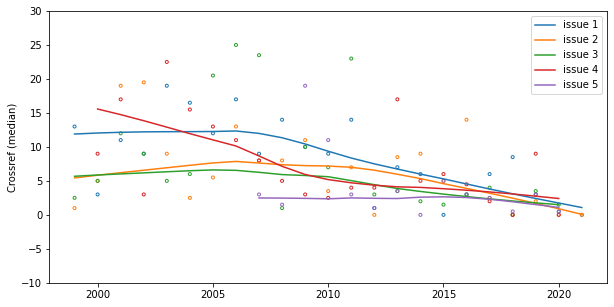

In [254]:
describe_crossref_3_median(info_year)

In [255]:
def describe_crossref_3_max(info_year):
    
    x = info_year['year'].values
    
    y1= info_year['Crossref_max_1'].values
    y2= info_year['Crossref_max_2'].values
    y3= info_year['Crossref_max_3'].values
    y4= info_year['Crossref_max_4'].values
    y5= info_year['Crossref_max_5'].values
    
    lowess=sm.nonparametric.lowess
    z1=lowess(y1,range(0,len(x)),frac=0.7)
    z2=lowess(y2,range(0,len(x)),frac=0.7)
    z3=lowess(y3,range(0,len(x)),frac=0.7)
    z4=lowess(y4,range(0,len(x)),frac=0.7)
    z5=lowess(y5,range(0,len(x)),frac=0.7)
    
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Crossref (maximum)', fontsize=10)
    
    ax.set_ylim(-10,250)
    
    ax.scatter(x, y1, marker='o', s=9,
               facecolors='none', edgecolors='#1f77b4')
    ax.plot(x,z1[:,1],color='#1f77b4',lw=1.5,label='issue 1')
    ax.scatter(x, y2, marker='o', s=9,
               facecolors='none', edgecolors='#ff7f0e')
    ax.plot(x,z2[:,1],color='#ff7f0e',lw=1.5,label='issue 2')
    ax.scatter(x, y3, marker='o', s=9,
               facecolors='none', edgecolors='#2ca02c')
    ax.plot(x[0:22:1],z3[:,1],color='#2ca02c',lw=1.5,label='issue 3')
    ax.scatter(x, y4, marker='o', s=9,
               facecolors='none', edgecolors='#d62728')
    ax.plot(x[1:22:1],z4[:,1],color='#d62728',lw=1.5,label='issue 4')
    ax.scatter(x, y5, marker='o', s=9,
               facecolors='none', edgecolors='#9467bd')
    ax.plot(x[8:22:1],z5[:,1],color='#9467bd',lw=1.5,label='issue 5')
    
    ax.legend()

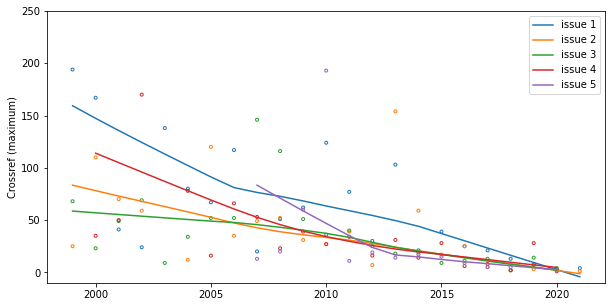

In [256]:
describe_crossref_3_max(info_year)

In [282]:
info_article = pd.read_csv(path+'\\info\\info_article_o_8_n.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_9.csv')
info_year = pd.read_csv(path+'\\info\\info_year_o_9.csv')

In [283]:
# factor 3: special issue

def change_df(my_df,column_name):
    
    year = my_df.index
    value = my_df.values
    
    my_df = pd.DataFrame()
    my_df['year'] = year
    my_df[column_name] = value
    
    return my_df


info_group_help_0 = pd.merge(info_issue[info_issue['special_1']==0][['number_volume','number_issue']], 
                             info_article, how = 'left')

year_group_help_mean_special_0 = info_group_help_0['Crossref'].groupby([info_group_help_0['year']]).mean()
year_group_help_mean_special_0 = change_df(year_group_help_mean_special_0, 'Crossref_mean_special_0')
info_year =  pd.merge(info_year, year_group_help_mean_special_0, how = 'left')

year_group_help_max_special_0 = info_group_help_0['Crossref'].groupby([info_group_help_0['year']]).max()
year_group_help_max_special_0 = change_df(year_group_help_max_special_0, 'Crossref_max_special_0')
info_year =  pd.merge(info_year, year_group_help_max_special_0, how = 'left')

year_group_help_median_special_0 = info_group_help_0['Crossref'].groupby([info_group_help_0['year']]).median()
year_group_help_median_special_0 = change_df(year_group_help_median_special_0, 'Crossref_median_special_0')
info_year =  pd.merge(info_year, year_group_help_median_special_0, how = 'left')


info_group_help_1 = pd.merge(info_issue[info_issue['special_1']==1][['number_volume','number_issue']], 
                             info_article, how = 'left')

year_group_help_mean_special_1 = info_group_help_1['Crossref'].groupby([info_group_help_1['year']]).mean()
year_group_help_mean_special_1 = change_df(year_group_help_mean_special_1, 'Crossref_mean_special_1')
info_year =  pd.merge(info_year, year_group_help_mean_special_1, how = 'left')

year_group_help_max_special_1 = info_group_help_1['Crossref'].groupby([info_group_help_1['year']]).max()
year_group_help_max_special_1 = change_df(year_group_help_max_special_1, 'Crossref_max_special_1')
info_year =  pd.merge(info_year, year_group_help_max_special_1, how = 'left')

year_group_help_median_special_1 = info_group_help_1['Crossref'].groupby([info_group_help_1['year']]).median()
year_group_help_median_special_1 = change_df(year_group_help_median_special_1, 'Crossref_median_special_1')
info_year =  pd.merge(info_year, year_group_help_median_special_1, how = 'left')

In [285]:
info_year.tail()

,year,article_quant,article_one_quant,article_one_share,article_judge_quant,article_judge_share,number_review,Crossref_mean_1,Crossref_max_1,Crossref_median_1,...,Crossref_median_4,Crossref_mean_5,Crossref_max_5,Crossref_median_5,Crossref_mean_special_0,Crossref_max_special_0,Crossref_median_special_0,Crossref_mean_special_1,Crossref_max_special_1,Crossref_median_special_1
18,2017,36,22,0.611111,6,0.166667,4,6.428571,21,6.0,...,2.0,2.375000,5.0,2.5,4.454545,21,3.0,2.357143,5.0,2.5
19,2018,38,20,0.526316,8,0.210526,3,8.166667,13,8.5,...,0.0,1.500000,5.0,0.5,2.478261,13,1.0,0.933333,5.0,0.0
20,2019,38,11,0.289474,15,0.394737,0,3.250000,7,3.0,...,9.0,4.000000,8.0,3.0,4.142857,14,3.0,6.666667,28.0,3.0
21,2020,33,14,0.424242,9,0.272727,4,0.900000,3,0.5,...,0.0,0.666667,2.0,0.5,0.939394,4,1.0,NaN,NaN,NaN
22,2021,75,15,0.200000,18,0.240000,2,0.500000,4,0.0,...,NaN,NaN,NaN,NaN,0.357143,4,0.0,3.032787,17.0,2.0


In [286]:
info_year.to_csv(path+'\\info\\info_year_o_9_m.csv',index=False,sep=',')

In [336]:
def describe_crossref_4_mean(info_year):
    
    x0 = info_year['year'].values
    x1 = info_year[np.isnan(info_year['Crossref_mean_special_1'])==False]['year']
    
    y0= info_year['Crossref_mean_special_0'].values
    y1= info_year['Crossref_mean_special_1'].values
    
    lowess=sm.nonparametric.lowess
    z0=lowess(y0,range(0,len(x0)),frac=0.6)
    z1=lowess(y1,range(0,len(x0)),frac=0.6)
    
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Crossref (mean)', fontsize=10)
    
    ax.set_ylim(-10,40)
    
    ax.scatter(x0, y0, marker='o', s=9, label='normal issues',
               facecolors='none', edgecolors='#bcbd22')
    ax.scatter(x0, y1, marker='o', s=9, label='special issues',
               facecolors='none', edgecolors='#e377c2')
    
    ax.plot(x0,z0[:,1],color='#bcbd22',lw=1.5)
    ax.plot(x1,z1[:,1],color='#e377c2',lw=1.5)
    
    ax.legend()

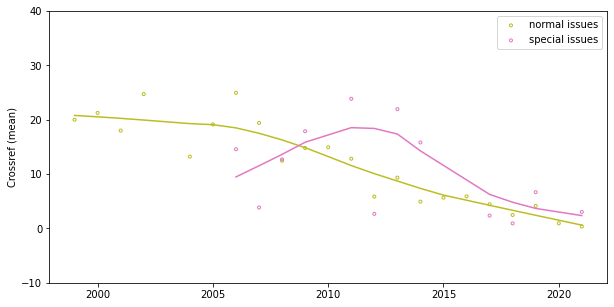

In [337]:
describe_crossref_4_mean(info_year)

In [340]:
def describe_crossref_4_median(info_year):
    
    x0 = info_year['year'].values
    x1 = info_year[np.isnan(info_year['Crossref_median_special_1'])==False]['year']
    
    y0= info_year['Crossref_median_special_0'].values
    y1= info_year['Crossref_median_special_1'].values
    
    lowess=sm.nonparametric.lowess
    z0=lowess(y0,range(0,len(x0)),frac=0.6)
    z1=lowess(y1,range(0,len(x0)),frac=0.6)
    
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Crossref (median)', fontsize=10)
    
    ax.set_ylim(-10,30)
    
    ax.scatter(x0, y0, marker='o', s=9, label='normal issues',
               facecolors='none', edgecolors='#bcbd22')
    ax.scatter(x0, y1, marker='o', s=9, label='special issues',
               facecolors='none', edgecolors='#e377c2')
    
    ax.plot(x0,z0[:,1],color='#bcbd22',lw=1.5)
    ax.plot(x1,z1[:,1],color='#e377c2',lw=1.5)
    
    ax.legend()

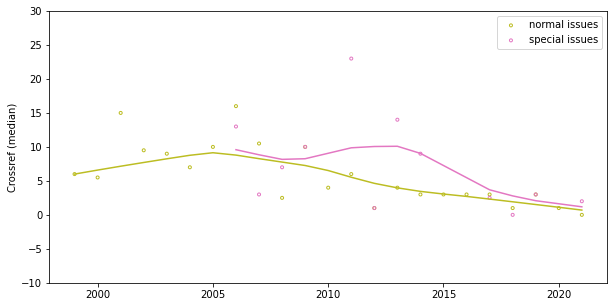

In [341]:
 describe_crossref_4_median(info_year)

In [346]:
def describe_crossref_4_max(info_year):
    
    x0 = info_year['year'].values
    x1 = info_year[np.isnan(info_year['Crossref_max_special_1'])==False]['year']
    
    y0= info_year['Crossref_max_special_0'].values
    y1= info_year['Crossref_max_special_1'].values
    
    lowess=sm.nonparametric.lowess
    z0=lowess(y0,range(0,len(x0)),frac=0.6)
    z1=lowess(y1,range(0,len(x0)),frac=0.6)
    
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Crossref (maximum)', fontsize=10)
    
    ax.set_ylim(-10,250)
    
    ax.scatter(x0, y0, marker='o', s=9, label='normal issues',
               facecolors='none', edgecolors='#bcbd22')
    ax.scatter(x0, y1, marker='o', s=9, label='special issues',
               facecolors='none', edgecolors='#e377c2')
    
    ax.plot(x0,z0[:,1],color='#bcbd22',lw=1.5)
    ax.plot(x1,z1[:,1],color='#e377c2',lw=1.5)
    
    ax.legend()

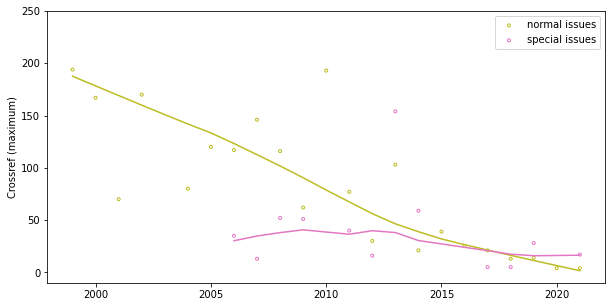

In [347]:
describe_crossref_4_max(info_year)